In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.subplots as sp
import warnings
from matplotlib.image import imread
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
"""
Dataset INFO 

Context
The dataset consists of over 2 million purchase records at a renowned Hunter's supermarket :)

Content
Supermarket consumer behaviour dataset consists of 2019501 Rows & 12 Columns :
order_id – (A unique number to identity the order)
user_id - (A unique number to identify the user)
order_number – (Number of the order)
order_dow – (Day of the Week the order was made)
order_hour_of_day – (Time of the order)
days_since_prior_order - (History of the order)
product_id – (Id of the product)
add_to_cart_order – (Number of items added to cart)
reordered – (If the reorder took place)
department_id - (Unique number allocated to each department)
department – (Names of the departments)
product_name – (Name of the products)
"""

"\nDataset INFO \n\nContext\nThe dataset consists of over 2 million purchase records at a renowned Hunter's supermarket :)\n\nContent\nSupermarket consumer behaviour dataset consists of 2019501 Rows & 12 Columns :\norder_id – (A unique number to identity the order)\nuser_id - (A unique number to identify the user)\norder_number – (Number of the order)\norder_dow – (Day of the Week the order was made)\norder_hour_of_day – (Time of the order)\ndays_since_prior_order - (History of the order)\nproduct_id – (Id of the product)\nadd_to_cart_order – (Number of items added to cart)\nreordered – (If the reorder took place)\ndepartment_id - (Unique number allocated to each department)\ndepartment – (Names of the departments)\nproduct_name – (Name of the products)\n"

In [3]:
def read_dataset(file):
    if file.split('.')[1]=='csv':
        df = pd.read_csv(file)
    if file.split('.')[1]=='xlsx':
        df = pd.read_excel(file)
    return df

In [4]:
def missing_control_plot(df,image_path=None):
    df_null = df.isna().sum()
    missing_df = pd.DataFrame(
                  data=[df_null],
                  columns=df.columns,
                  index=["Null Size"]).T.sort_values("Null Size", ascending=False)
    missing_df = missing_df.loc[(missing_df["Null Size"] > 0)]
    fig = px.bar(missing_df,x=missing_df.index, y="Null Size", hover_name='Null Size', 
                 color='Null Size',labels={
                         "index": "Columns",
                         },
                 color_discrete_sequence=['#D81F26'],template='plotly_dark',
                 title="Dataset Null Graph", width=1400, height=700)
    fig.update_layout(barmode='group')
    try:
        image = imread(image_path)
        fig, ax = plt.subplots(figsize=(15, 25))  
        ax.imshow(image)
        ax.axis('off')  
        plt.show()
    except:
        fig.show()
    return missing_df

In [5]:
def count_plot(df,variable_type,image_path=None):
    if variable_type=='num':
        liste = df.loc[:, df.dtypes != "object"].columns
        template = 'plotly_dark'
    if variable_type=='cat':
        liste = df.loc[:, df.dtypes == "object"].columns
        template = 'ggplot2'
    for i in liste:
        x = df[i].unique()
        if len(x)>25:
            print(f"{i} kolonunun unique sayısı 25' den fazla")
            continue
        y = [df[i][df[i] == j].count() for j in x]
        bar = px.bar(df, x=x, y=y, text=y,labels={
                         "x": i,
                        "y":"count",
                         },
                          color_discrete_sequence=['#D81F26'],color=y,
                          template=template, title="Unique Count",
                          width=1000, height=500)
        try:
            image = imread(image_path+f'count_plot_{variable_type}_{i}.png')
            fig, ax = plt.subplots(figsize=(15, 25))  
            ax.imshow(image)
            ax.axis('off')  
            plt.show()
        except:
            bar.show()

In [6]:
def time_day_range(x):
    return f'{"morning" if x in range(6, 12) else "afternoon" if x in range(12, 18) else "evening" if x in range(18, 23) else "night"}'

In [7]:
def order_number_group(num_orders):
    ranges = [(1, 10), (11, 20), (21, 30), (31, 40), (41, 50),(51, 60),(61, 70),(71, 80),(81, 90),(91, 100)]
    for r in ranges:
        if num_orders in range(r[0], r[1]+1):
            return f"{r[0]}-{r[1]} orders"
    return "More than 100 orders"

In [8]:
data = read_dataset('C:/Users/MahmutYAVUZ/Desktop/Software/Python/kaggle/clustering/data/raw/ECommerce_consumer behaviour.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000007 entries, 0 to 1000006
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1000007 non-null  int64  
 1   user_id                 1000007 non-null  int64  
 2   order_number            1000007 non-null  int64  
 3   order_dow               1000007 non-null  int64  
 4   order_hour_of_day       1000007 non-null  int64  
 5   days_since_prior_order  938192 non-null   float64
 6   product_id              1000007 non-null  int64  
 7   add_to_cart_order       1000007 non-null  int64  
 8   reordered               1000007 non-null  int64  
 9   department_id           1000007 non-null  int64  
 10  department              1000007 non-null  object 
 11  product_name            1000007 non-null  object 
dtypes: float64(1), int64(9), object(2)
memory usage: 91.6+ MB


In [10]:
data.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    61815
product_id                    0
add_to_cart_order             0
reordered                     0
department_id                 0
department                    0
product_name                  0
dtype: int64

In [11]:
image_pth = "C:/Users/MahmutYAVUZ/Desktop/Software/Python/kaggle/clustering/images/"

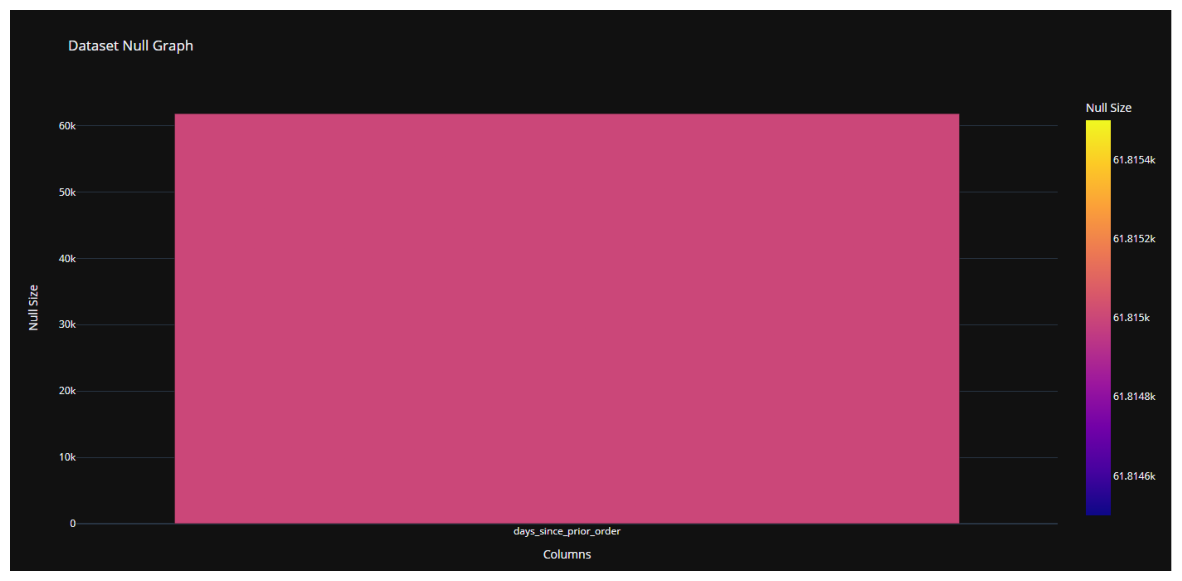

In [12]:
# GitHub only displays static images, so I saved the images and visualized them later.
missing_data = missing_control_plot(data,image_path=image_pth+'missing_control_plot.png')

In [13]:
"""
days_since_prior_order - Daha önce kaç kere sipariş etmiş ?
"""
data['days_since_prior_order'] = data['days_since_prior_order'].fillna(0).astype(int)

order_id kolonunun unique sayısı 25' den fazla
user_id kolonunun unique sayısı 25' den fazla
order_number kolonunun unique sayısı 25' den fazla


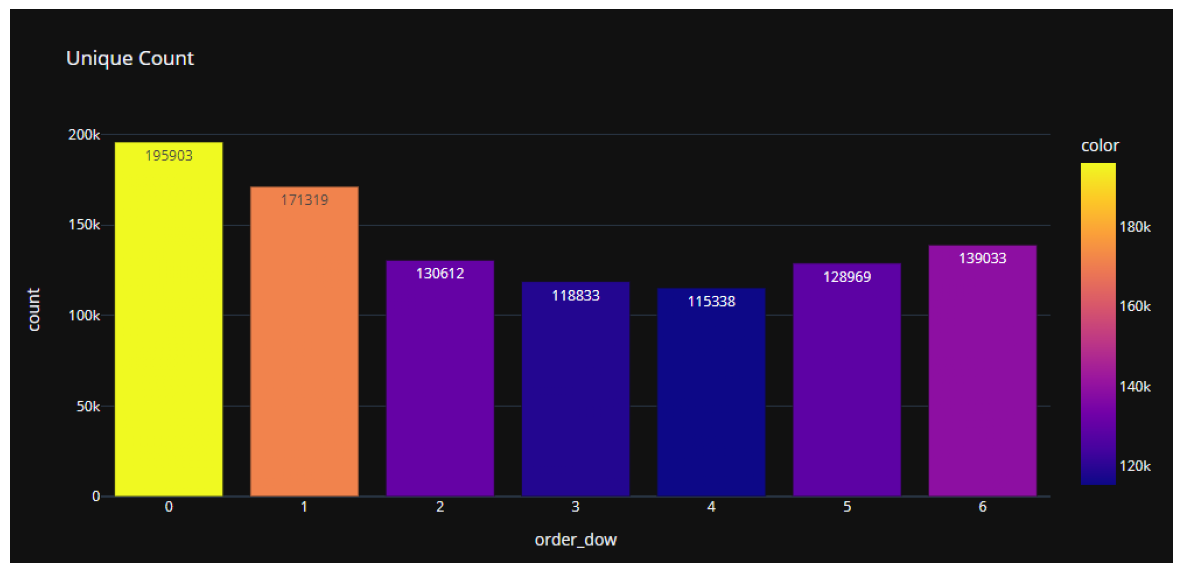

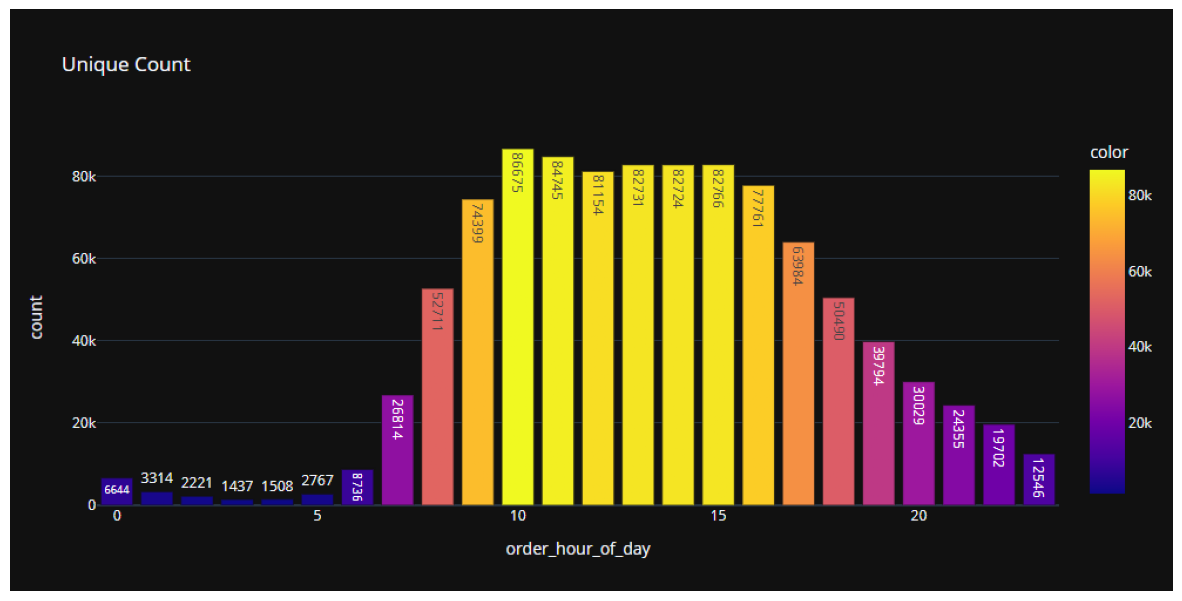

days_since_prior_order kolonunun unique sayısı 25' den fazla
product_id kolonunun unique sayısı 25' den fazla
add_to_cart_order kolonunun unique sayısı 25' den fazla


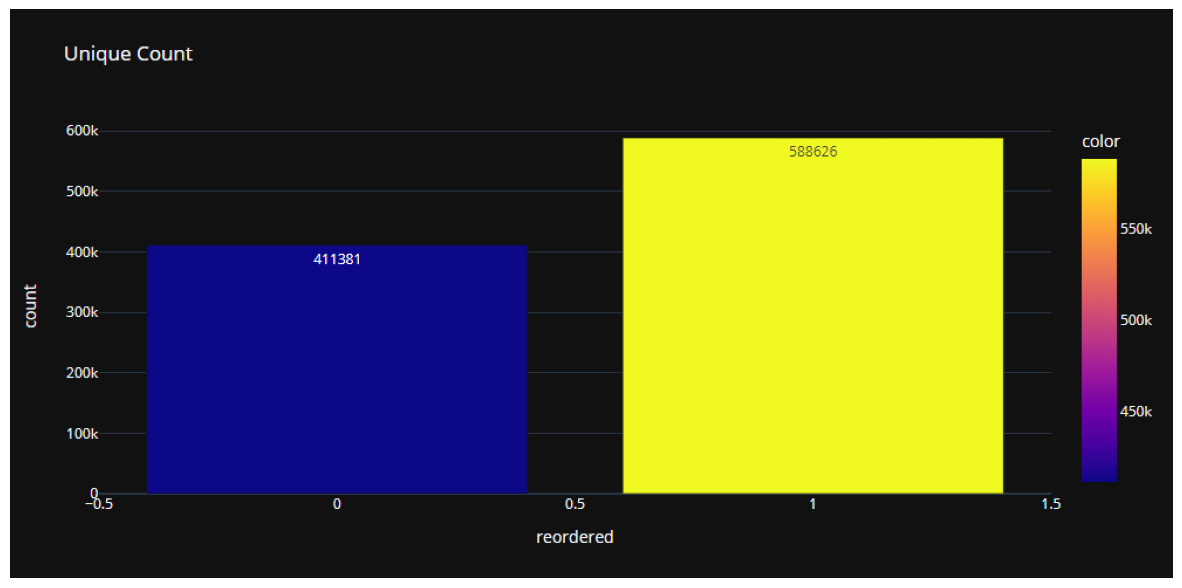

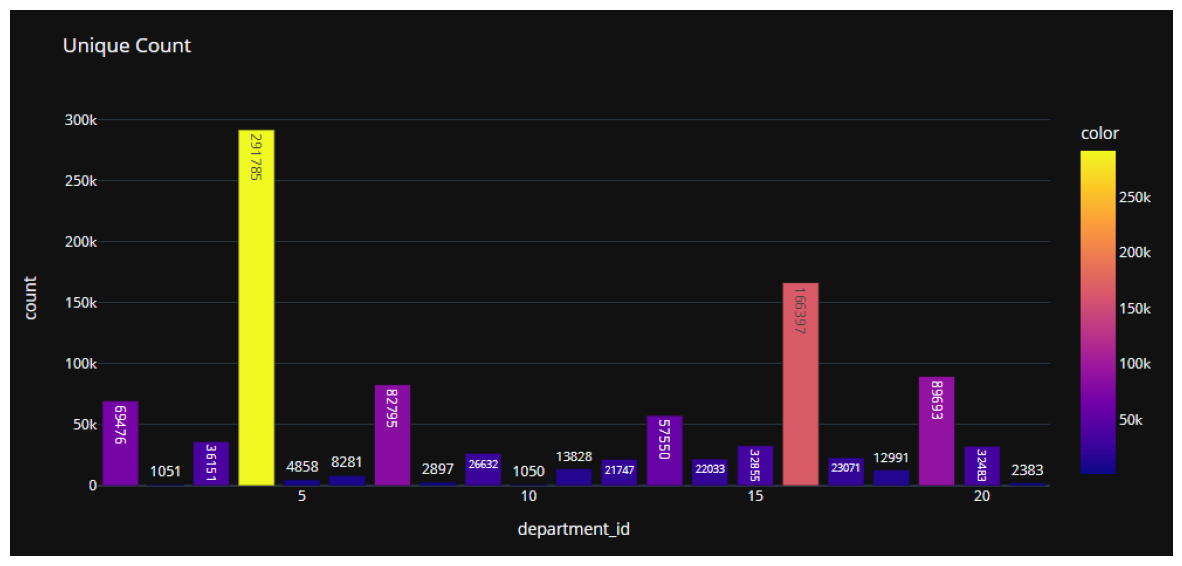

In [14]:
# GitHub only displays static images, so I saved the images and visualized them later.
count_plot(data,variable_type='num',image_path=image_pth)

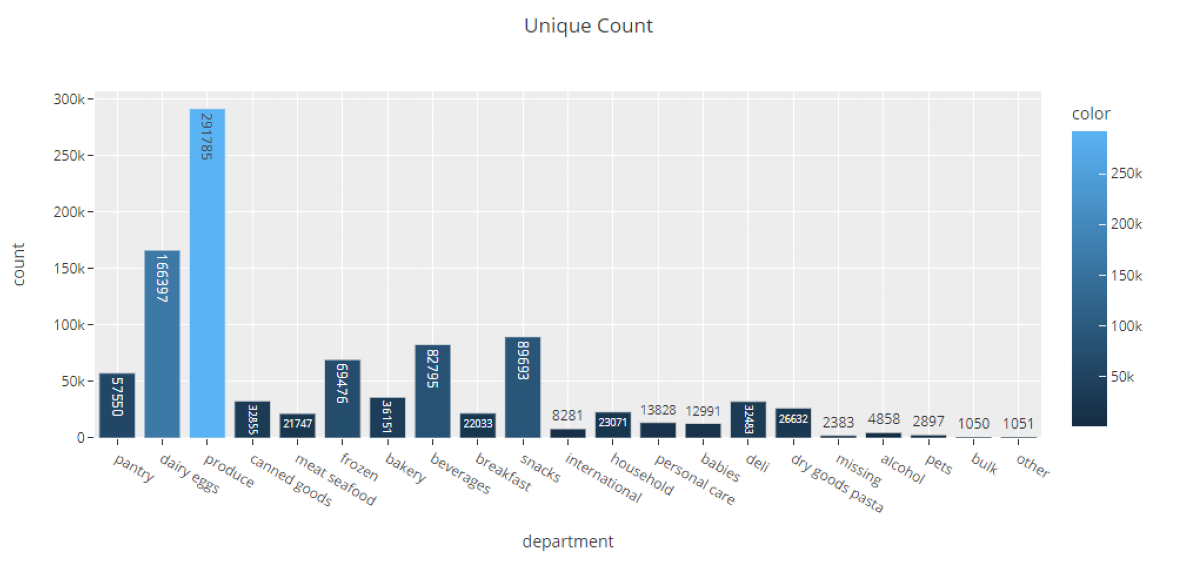

product_name kolonunun unique sayısı 25' den fazla


In [15]:
# GitHub only displays static images, so I saved the images and visualized them later.
count_plot(data,variable_type='cat',image_path=image_pth)

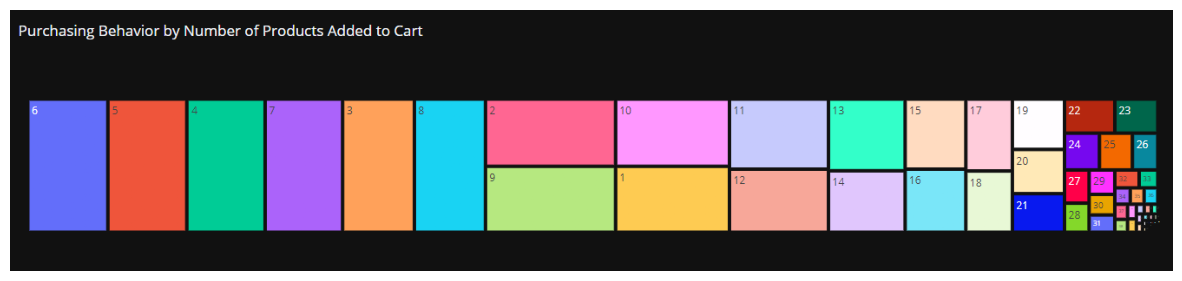

In [16]:
grouped = data.groupby("order_id")["add_to_cart_order"].max().reset_index()
grouped = grouped["add_to_cart_order"].value_counts().reset_index()
grouped.columns = ["Number of products added to cart", "Number of unique orders"]

fig = px.treemap(grouped, path=["Number of products added to cart"], values="Number of unique orders",
                 labels={"Number of products added to cart": "Number of products added to cart",
                         "Number of unique orders": "Number of unique orders"},
                 title="Purchasing Behavior by Number of Products Added to Cart",template='plotly_dark')

try:
    # GitHub only displays static images, so I saved the images and visualized them later.
    image = imread(image_pth+'add_to_cart_order.png')
    fig, ax = plt.subplots(figsize=(15, 25))  
    ax.imshow(image)
    ax.axis('off')  
    plt.show()
except:
    fig.show()

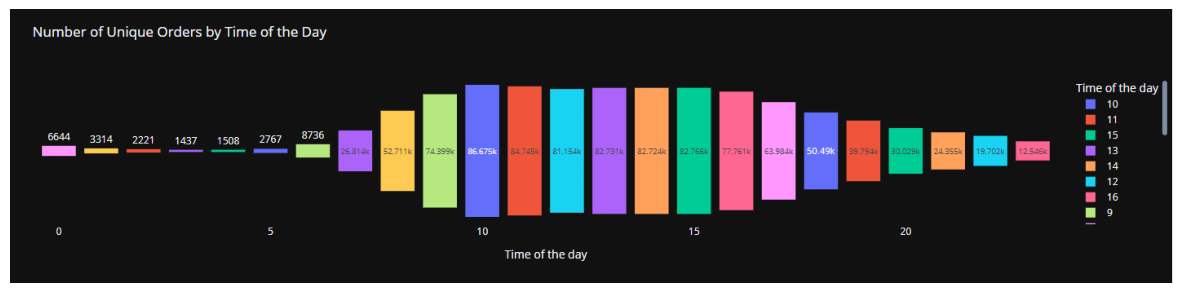

In [17]:
grouped = data.groupby('order_hour_of_day', as_index=True).agg({'user_id':'count'}).sort_values(by='user_id',ascending=False)
grouped.reset_index(inplace=True)
fig = px.funnel(grouped, x='order_hour_of_day', y='user_id',
                labels={'order_hour_of_day': 'Time of the day', 'user_id': 'Number of unique orders'},
                title='Number of Unique Orders by Time of the Day',color='order_hour_of_day',
               template='plotly_dark')

try:
    # GitHub only displays static images, so I saved the images and visualized them later.
    image = imread(image_pth+'order_hour_of_day.png')
    fig, ax = plt.subplots(figsize=(15, 25))  
    ax.imshow(image)
    ax.axis('off')  
    plt.show()
except:
    fig.show()

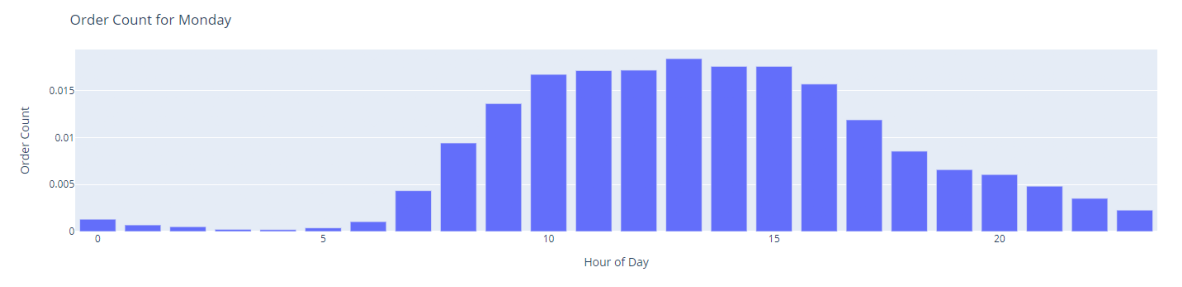

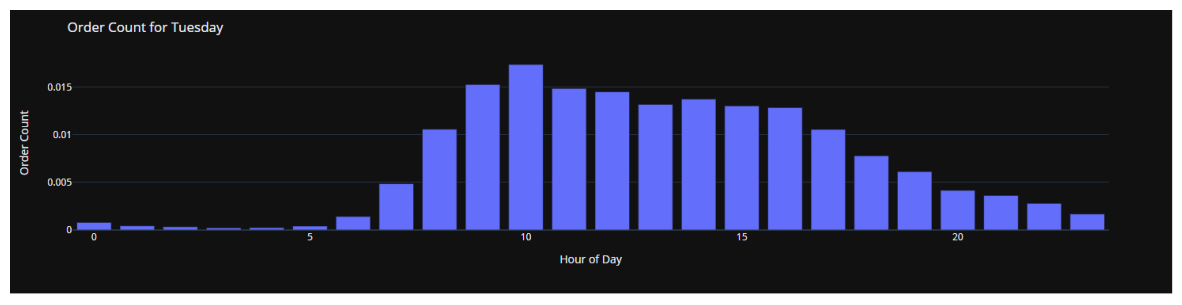

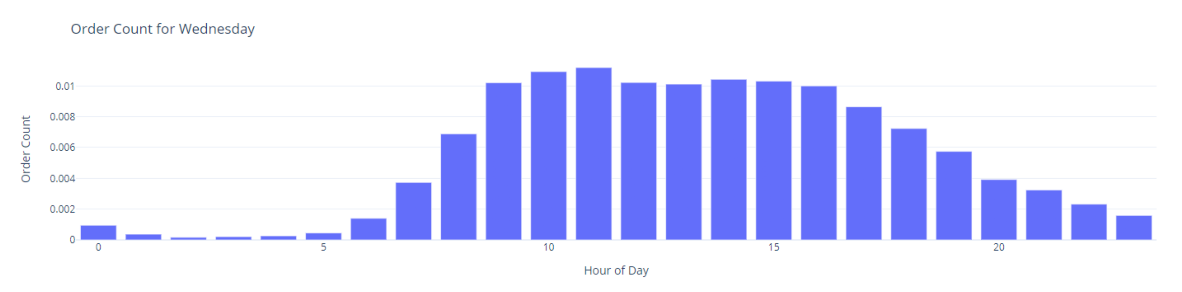

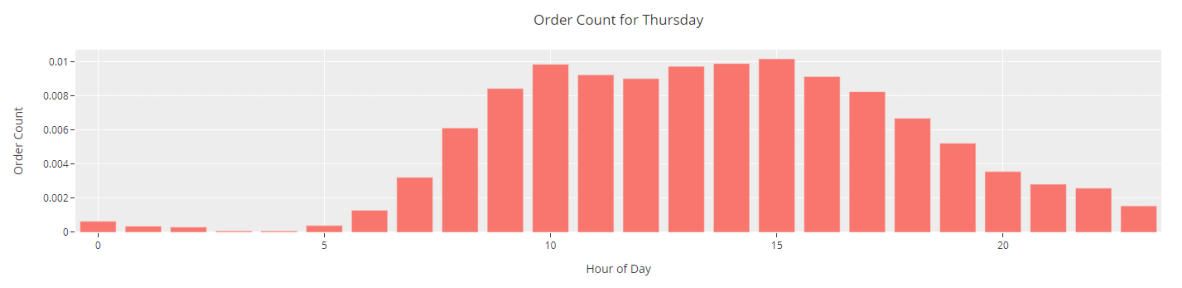

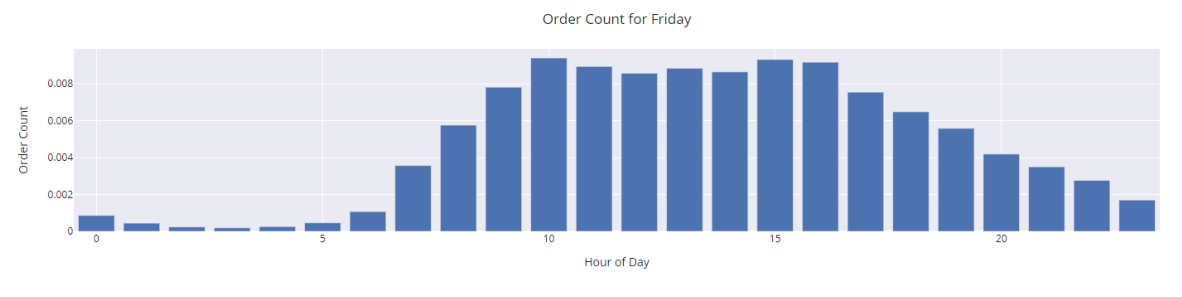

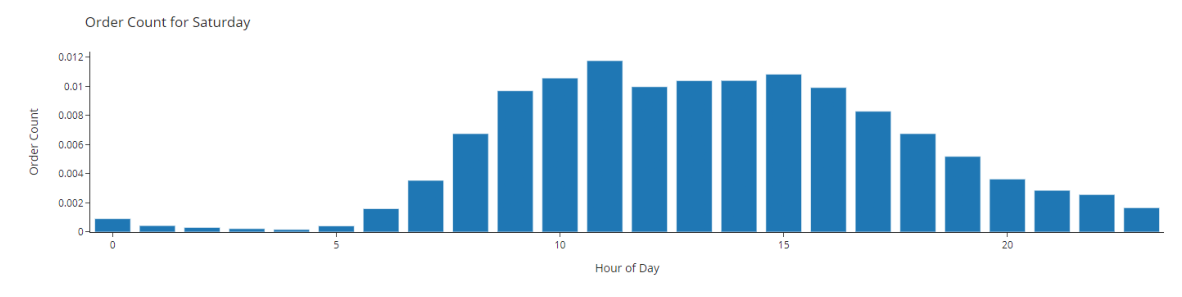

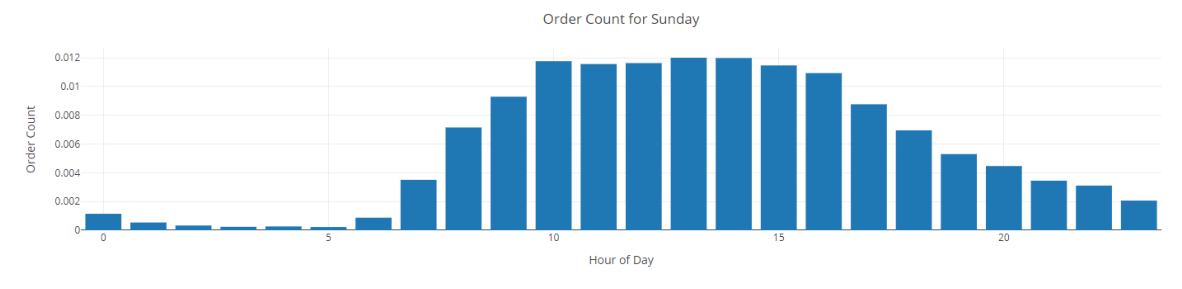

In [18]:
import plotly.express as px
import random

day_hour_df = data.groupby(["order_dow", "order_hour_of_day"])["order_number"].count().reset_index()
day_hour_df_piv = day_hour_df.pivot('order_dow', 'order_hour_of_day', 'order_number') / data.shape[0]

day_hour_df_piv.reset_index(inplace=True)

figs = []

templates = ['plotly', 'plotly_dark', 'plotly_white', 'ggplot2', 'seaborn', 'simple_white','gridon']
for i in range(len(day_hour_df_piv)):
    day_df = day_hour_df_piv.iloc[i]
    labels = day_df.index[1:]  
    values = day_df[1:].values  
    day_name = f"{day_df['order_dow'].astype('str').replace('0.0','Monday').replace('1.0','Tuesday').replace('2.0','Wednesday').replace('3.0','Thursday').replace('4.0','Friday').replace('5.0','Saturday').replace('6.0','Sunday')}"
    fig = px.bar(x=labels, y=values, template=templates[i])

    fig.update_layout(
        showlegend=True,
        title=f"Order Count for {day_name}",
        xaxis=dict(title="Hour of Day"),
        yaxis=dict(title="Order Count")
    )

    figs.append(fig)

for index,fig in enumerate(figs):
    try:
        # GitHub only displays static images, so I saved the images and visualized them later.
        image = imread(image_pth+f'order_count_{index}.png')
        fig, ax = plt.subplots(figsize=(15, 25))  
        ax.imshow(image)
        ax.axis('off')  
        plt.show()
    except:
        fig.show()


In [19]:
data['time_day_range'] = data['order_hour_of_day'].apply(time_day_range)

In [20]:
data

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,time_day_range
0,2425083,49125,1,2,18,0,17,1,0,13,pantry,baking ingredients,evening
1,2425083,49125,1,2,18,0,91,2,0,16,dairy eggs,soy lactosefree,evening
2,2425083,49125,1,2,18,0,36,3,0,16,dairy eggs,butter,evening
3,2425083,49125,1,2,18,0,83,4,0,4,produce,fresh vegetables,evening
4,2425083,49125,1,2,18,0,83,5,0,4,produce,fresh vegetables,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000002,2036858,156505,20,5,10,5,94,23,0,7,beverages,tea,morning
1000003,2036858,156505,20,5,10,5,3,24,0,19,snacks,energy granola bars,morning
1000004,2036858,156505,20,5,10,5,17,25,0,13,pantry,baking ingredients,morning
1000005,2036858,156505,20,5,10,5,83,26,0,4,produce,fresh vegetables,morning


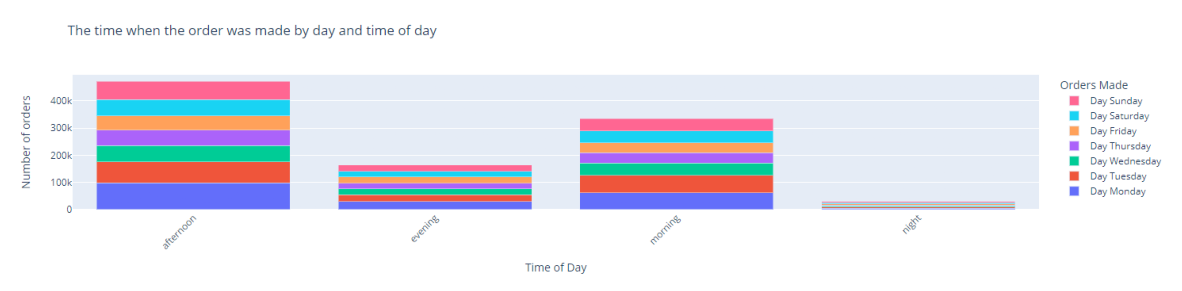

In [21]:
import plotly.graph_objects as go

orders_by_day_time = data.pivot_table(
    index='order_dow',
    columns='time_day_range',
    values='user_id',
    aggfunc='count'
)
fig = go.Figure()

for col, day in enumerate(orders_by_day_time.index):
    fig.add_trace(go.Bar(
        x=orders_by_day_time.columns,
        y=orders_by_day_time.loc[day],
        name='Day {}'.format(str(day).replace('0','Monday').replace('1','Tuesday').replace('2','Wednesday').replace('3','Thursday').replace('4','Friday').replace('5','Saturday').replace('6','Sunday')),
    ))

fig.update_layout(
    title='The time when the order was made by day and time of day',
    xaxis=dict(title='Time of Day'),
    yaxis=dict(title='Number of orders'),
    xaxis_tickangle=-45,
    barmode='stack',
    legend=dict(title='Orders Made')
)

try:
    # GitHub only displays static images, so I saved the images and visualized them later.
    image = imread(image_pth+'time_day_range.png')
    fig, ax = plt.subplots(figsize=(15, 25))  
    ax.imshow(image)
    ax.axis('off')  
    plt.show()
except:
    fig.show()

In [22]:
data['order_number_group']=data['order_number'].apply(order_number_group)
data

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,time_day_range,order_number_group
0,2425083,49125,1,2,18,0,17,1,0,13,pantry,baking ingredients,evening,1-10 orders
1,2425083,49125,1,2,18,0,91,2,0,16,dairy eggs,soy lactosefree,evening,1-10 orders
2,2425083,49125,1,2,18,0,36,3,0,16,dairy eggs,butter,evening,1-10 orders
3,2425083,49125,1,2,18,0,83,4,0,4,produce,fresh vegetables,evening,1-10 orders
4,2425083,49125,1,2,18,0,83,5,0,4,produce,fresh vegetables,evening,1-10 orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000002,2036858,156505,20,5,10,5,94,23,0,7,beverages,tea,morning,11-20 orders
1000003,2036858,156505,20,5,10,5,3,24,0,19,snacks,energy granola bars,morning,11-20 orders
1000004,2036858,156505,20,5,10,5,17,25,0,13,pantry,baking ingredients,morning,11-20 orders
1000005,2036858,156505,20,5,10,5,83,26,0,4,produce,fresh vegetables,morning,11-20 orders


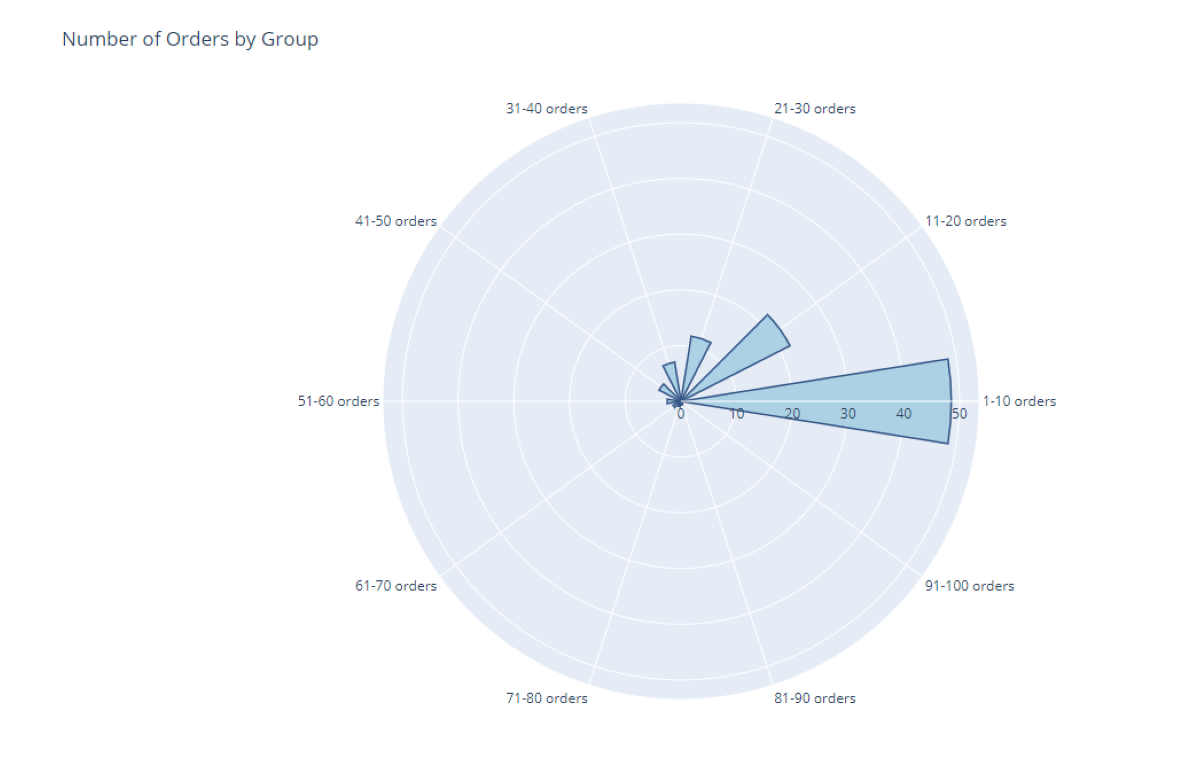

In [23]:
import plotly.graph_objects as go
orders_by_group = data.groupby('order_number_group')['user_id'].count().sort_values(ascending=False)

percentage_by_group = orders_by_group / orders_by_group.sum() * 100

fig = go.Figure()

fig.add_trace(go.Barpolar(
    r=percentage_by_group.values,
    theta=percentage_by_group.index,
    width=0.5,
    marker=dict(color='rgb(158,202,225)', line=dict(color='rgb(8,48,107)', width=1.5)),
    opacity=0.8,
    text=percentage_by_group.values,
    hovertemplate='%{text:.2f}%<br>Group %{theta}<extra></extra>'
))

fig.update_layout(
    title='Number of Orders by Group',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(percentage_by_group.values) + 5]
        )
    ),
    width=1200,  
    height=700 
)

try:
    # GitHub only displays static images, so I saved the images and visualized them later.
    image = imread(image_pth+'number_orders_group.png')
    fig, ax = plt.subplots(figsize=(15, 25))  
    ax.imshow(image)
    ax.axis('off')  
    plt.show()
except:
    fig.show()

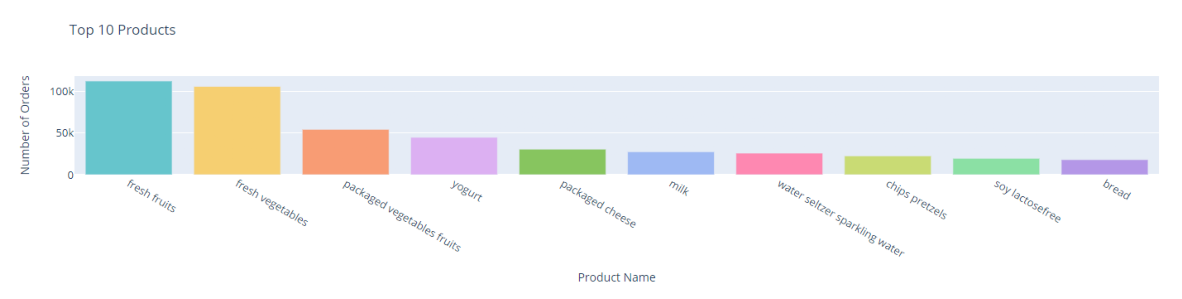

In [24]:
import plotly.express as px

top_products = data.groupby('product_name')['user_id'].count().sort_values(ascending=False).head(10)

fig = px.bar(top_products, x=top_products.index, y=top_products.values, color=top_products.index,
             color_discrete_sequence=px.colors.qualitative.Pastel, title='Top 10 Products')

fig.update_layout(
    xaxis=dict(title='Product Name', tickfont=dict(size=13)),
    yaxis=dict(title='Number of Orders', tickfont=dict(size=13)),
    showlegend=False
)

try:
    # GitHub only displays static images, so I saved the images and visualized them later.
    image = imread(image_pth+'number_products.png')
    fig, ax = plt.subplots(figsize=(15, 25))  
    ax.imshow(image)
    ax.axis('off')  
    plt.show()
except:
    fig.show()

In [25]:
data

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,time_day_range,order_number_group
0,2425083,49125,1,2,18,0,17,1,0,13,pantry,baking ingredients,evening,1-10 orders
1,2425083,49125,1,2,18,0,91,2,0,16,dairy eggs,soy lactosefree,evening,1-10 orders
2,2425083,49125,1,2,18,0,36,3,0,16,dairy eggs,butter,evening,1-10 orders
3,2425083,49125,1,2,18,0,83,4,0,4,produce,fresh vegetables,evening,1-10 orders
4,2425083,49125,1,2,18,0,83,5,0,4,produce,fresh vegetables,evening,1-10 orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000002,2036858,156505,20,5,10,5,94,23,0,7,beverages,tea,morning,11-20 orders
1000003,2036858,156505,20,5,10,5,3,24,0,19,snacks,energy granola bars,morning,11-20 orders
1000004,2036858,156505,20,5,10,5,17,25,0,13,pantry,baking ingredients,morning,11-20 orders
1000005,2036858,156505,20,5,10,5,83,26,0,4,produce,fresh vegetables,morning,11-20 orders


### RFM Clustering

In [26]:
rfm_f = data.groupby('user_id')['order_id'].count().reset_index().rename(columns={'order_id':'Frequency'})

In [27]:
rfm_r = (data['order_id'].max()-data.groupby('user_id')['order_id'].max()).reset_index().rename(columns={'order_id':'Recency'})

In [28]:
prices = {
    'beverages': 7,
    'breakfast': 20,
    'snacks': 11,
    'international': 12,
    'meat seafood': 80,
    'frozen': 90,
    'personal care': 40,
    'babies': 150,
    'deli': 40,
    'dry goods pasta': 30,
    'alcohol': 45,
    'pets': 60,
    'bulk': 30,
    'other': 40,
    'bakery': 10,
    'pantry': 20,
    'dairy eggs': 30,
    'produce': 15,
    'canned goods': 30,
    'household': 400,
    'missing':0
}

In [29]:
total_prices = sum(prices.values())
prices = {k: v/total_prices*100 for k, v in prices.items()}

In [30]:
data['price'] = data['department'].map(prices)
rfm_m = data.groupby('user_id')['price'].sum().reset_index().rename(columns={'price':'Monetary'})
rfm = rfm_r.merge(rfm_f, on='user_id').merge(rfm_m, on='user_id')

In [31]:
rfm['Recency_score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['Frequency_score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm['Monetary_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm['Score']=rfm['Recency_score'].astype(int)+rfm['Frequency_score'].astype(int)+rfm['Monetary_score'].astype(int)

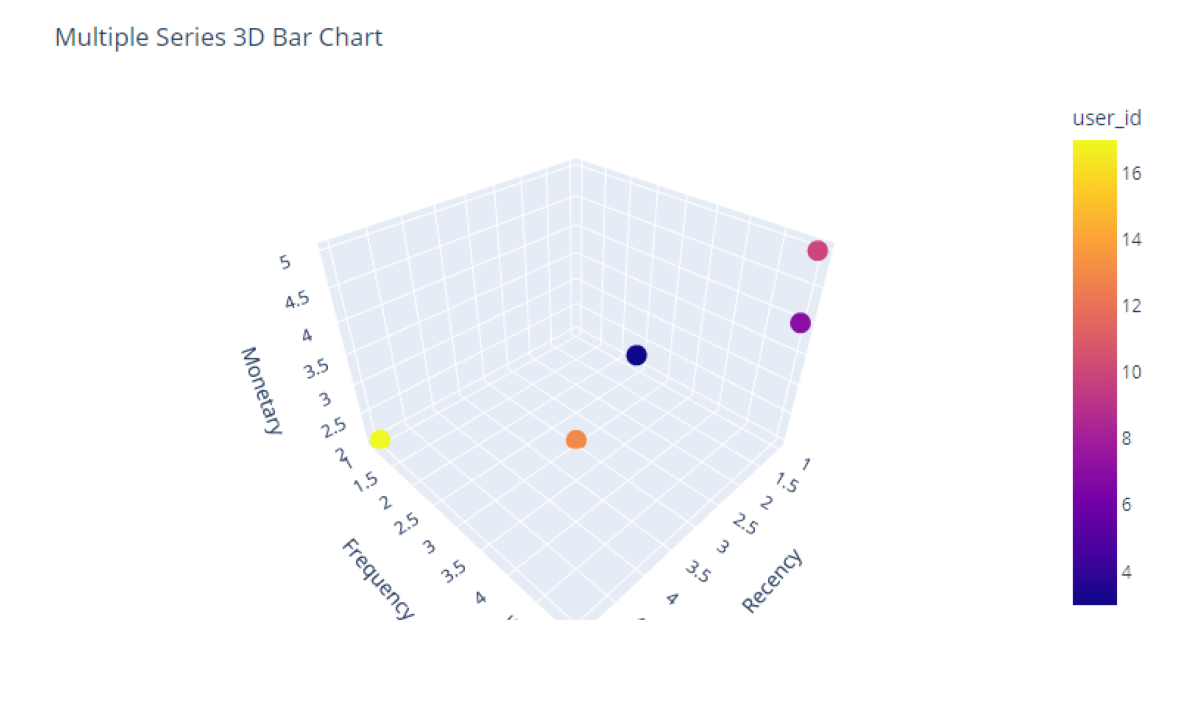

In [32]:
plot_rfm = rfm.head().set_index('user_id')
fig = go.Figure()

fig = px.scatter_3d(plot_rfm, x='Recency_score', y='Frequency_score', z='Monetary_score',
              color=plot_rfm.index,width=800,height=500)


fig.update_layout(
    title='Multiple Series 3D Bar Chart',
    scene=dict(
        xaxis=dict(title='Recency'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Monetary')
    ),
    showlegend=True
)

try:
    # GitHub only displays static images, so I saved the images and visualized them later.
    image = imread(image_pth+'3d_bar.png')
    fig, ax = plt.subplots(figsize=(15, 25))  
    ax.imshow(image)
    ax.axis('off')  
    plt.show()
except:
    fig.show()

In [33]:
rfm

,user_id,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,Score
0,3,1383863,14,66.810345,3,4,4,11
1,7,3300021,24,51.034483,1,5,4,10
2,10,3337679,30,78.017241,1,5,5,11
3,13,1514905,10,16.896552,3,3,2,8
4,17,280044,5,10.948276,5,1,2,8
...,...,...,...,...,...,...,...,...
67972,206201,317789,12,26.724138,5,3,3,11
67973,206204,909339,20,77.586207,4,4,5,13
67974,206206,2772849,8,36.120690,1,2,3,6
67975,206208,2978770,18,39.137931,1,4,4,9


In [34]:
rfm_data = rfm[['Frequency','Recency','Monetary']]

In [35]:
def fit_kmeans(dataset,n_clusters,random_state):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=n_clusters,random_state=random_state))
    ])

    labels = pipeline.fit_predict(dataset)

    silhouette_avg = round(silhouette_score(dataset, labels, random_state=random_state), 3)
    inertia_score = round(pipeline.named_steps['kmeans'].inertia_, 2)
    return silhouette_avg,inertia_score,labels

In [36]:
rfm_data_ = rfm_data[:10000].copy()

Cluster No : 2, Silhouette Score : 0.006, SS Delta: 0.0, Inertia: 19031.79, Inertia Delta : 0.0
Cluster No : 3, Silhouette Score : 0.311, SS Delta: 0.305, Inertia: 12500.78, Inertia Delta : -6531.01
Cluster No : 4, Silhouette Score : 0.237, SS Delta: -0.074, Inertia: 9784.21, Inertia Delta : -2716.5700000000015
Cluster No : 5, Silhouette Score : 0.198, SS Delta: -0.039, Inertia: 8568.72, Inertia Delta : -1215.4899999999998
Cluster No : 6, Silhouette Score : -0.015, SS Delta: -0.213, Inertia: 7467.99, Inertia Delta : -1100.7299999999996
Cluster No : 7, Silhouette Score : 0.102, SS Delta: 0.117, Inertia: 6521.98, Inertia Delta : -946.0100000000002
Cluster No : 8, Silhouette Score : 0.093, SS Delta: -0.009, Inertia: 5961.36, Inertia Delta : -560.6199999999999
Cluster No : 9, Silhouette Score : 0.063, SS Delta: -0.03, Inertia: 5487.2, Inertia Delta : -474.15999999999985
Cluster No : 10, Silhouette Score : -0.041, SS Delta: -0.104, Inertia: 5145.47, Inertia Delta : -341.72999999999956


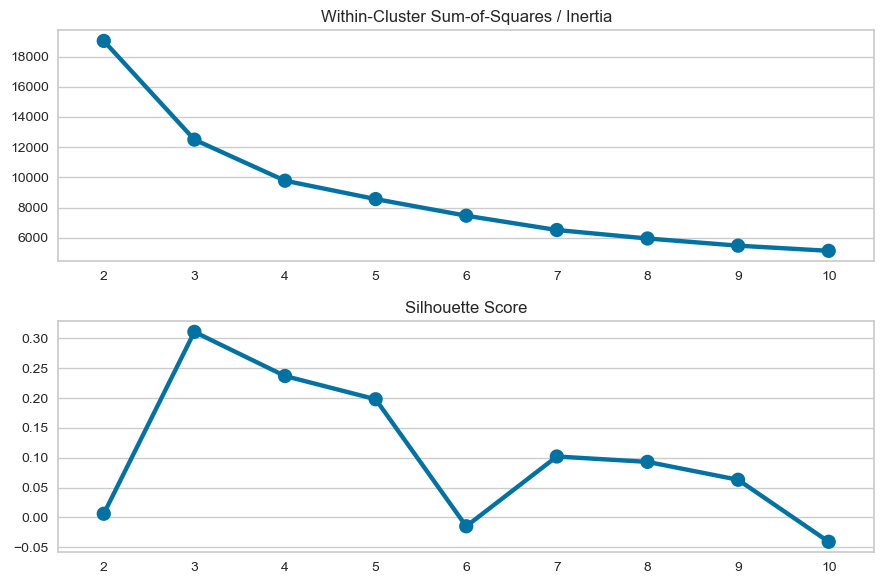

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def optimal_kmeans(dataset, start=2, end=11,random_state=42):
    n_clu = []
    km_ss = []
    inertia = []

    for n_clusters in range(start, end):
        silhouette_avg,inertia_score,labels = fit_kmeans(dataset,n_clusters,random_state)
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
        inertia.append(inertia_score)
        print(f"Cluster No : {n_clusters}, Silhouette Score : {silhouette_avg}, SS Delta: {(km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)}, Inertia: {inertia_score}, Inertia Delta : {(inertia[n_clusters - start] - inertia[n_clusters - start - 1])}")
        if n_clusters == end - 1:
            plt.figure(figsize=(9,6))
            plt.subplot(2, 1, 1)
            plt.title('Within-Cluster Sum-of-Squares / Inertia')
            sns.pointplot(x=n_clu, y=inertia)
            plt.subplot(2, 1, 2)
            plt.title('Silhouette Score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.tight_layout()
            plt.show()

optimal_kmeans(rfm_data_)

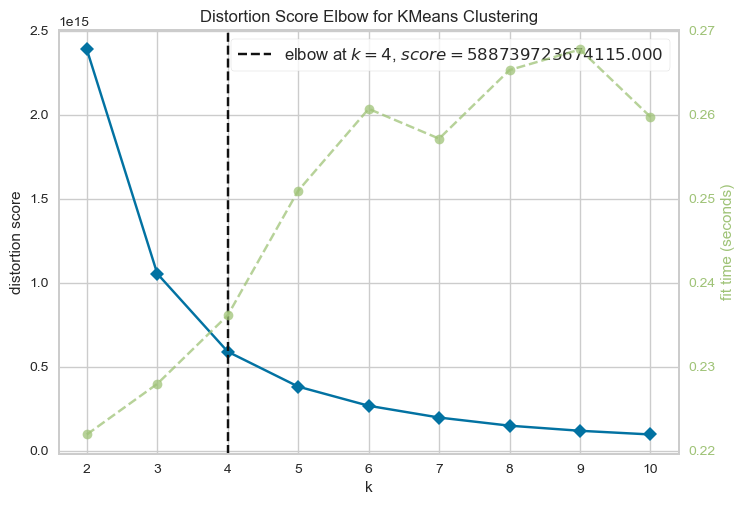

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_data_scale=scaler.fit_transform(rfm_data_)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), timings= True)
visualizer.fit(rfm_data_)      
visualizer.show()        

In [39]:
score = silhouette_score(rfm_data_, model.labels_, metric='euclidean')
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.541


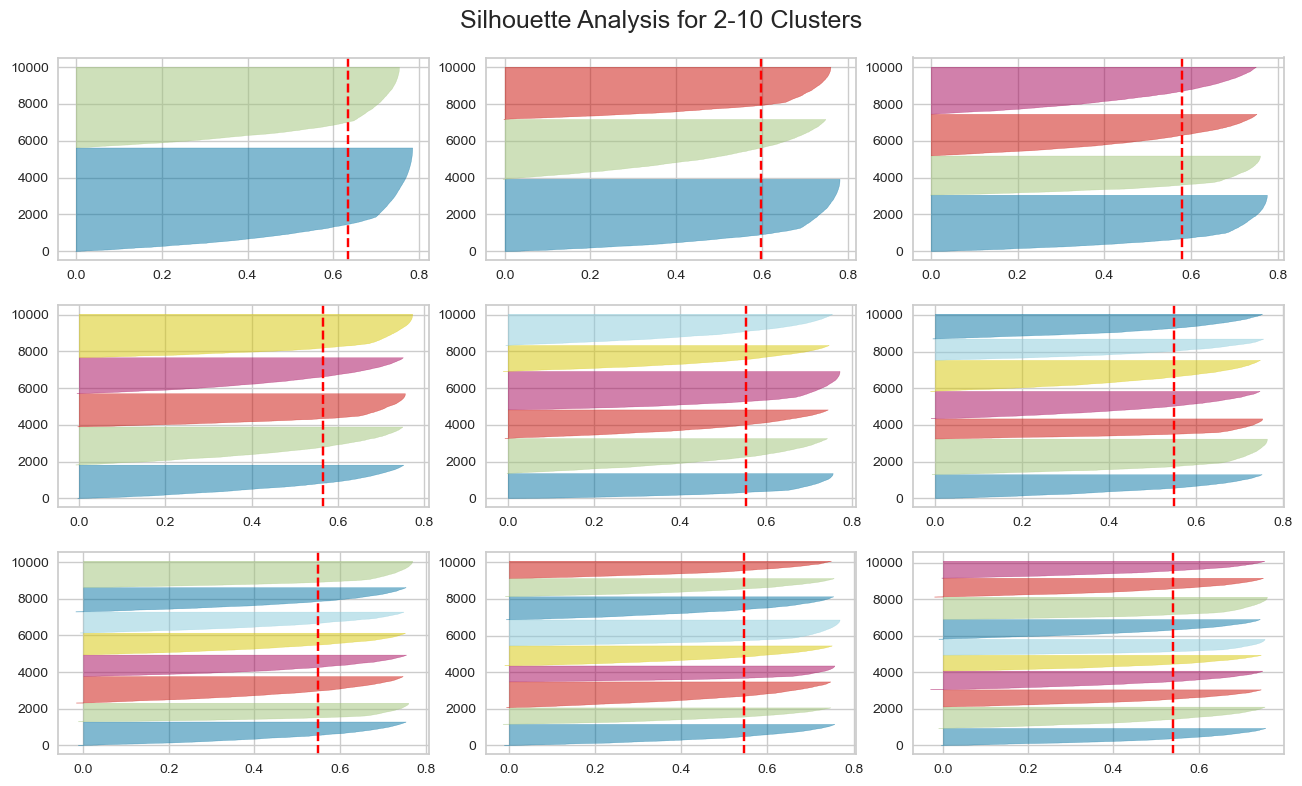

In [40]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 3, figsize=(13,8))
fig.suptitle('Silhouette Analysis for 2-10 Clusters', size=18)
plt.tight_layout()

for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i-2, 3)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(rfm_data_)

plt.show()

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('dbscan', DBSCAN(eps=20, min_samples=9, metric='euclidean')) 
])

labels = pipeline.fit_predict(rfm_data_)

unique_labels, counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Küme {label}: {count} örnek")


Küme 0: 10000 örnek


In [42]:
rfm_db_scan = rfm_data_.copy()

<Axes: xlabel='Monetary', ylabel='Frequency'>

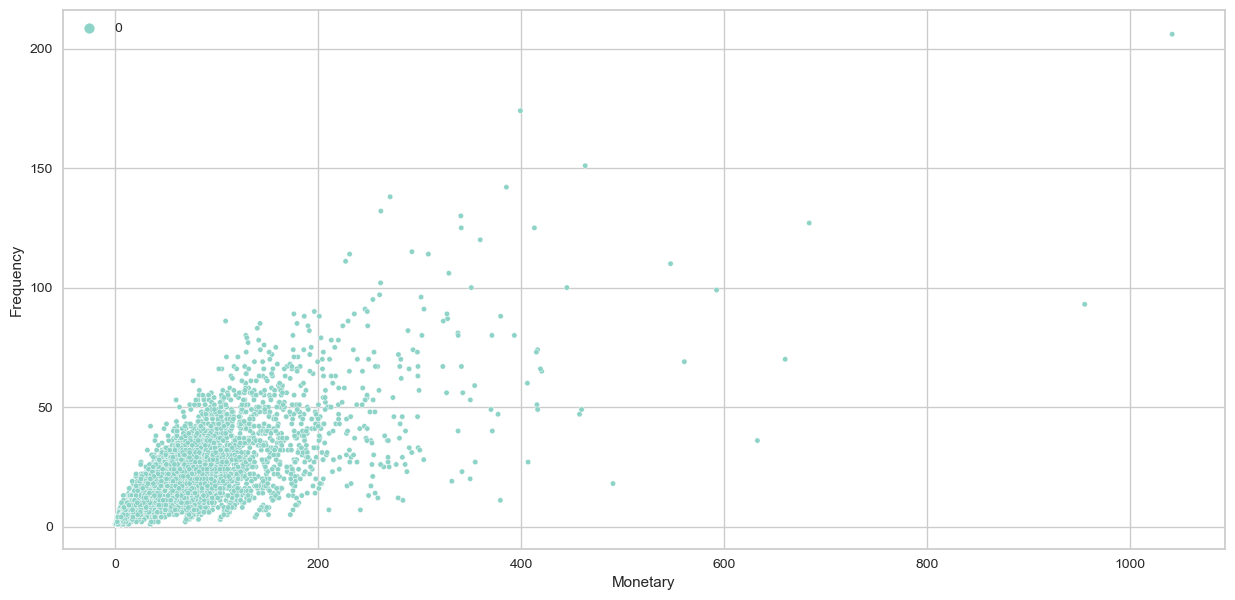

In [43]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=rfm_db_scan, x='Monetary', y='Frequency', hue = labels, s=15, palette="Set3")

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import numpy as np

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('gmm', GaussianMixture(n_components=8)) 
])

pipeline.fit(rfm_data_)

labels = pipeline.predict(rfm_data_)

unique_labels, counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Küme {label}: {count} örnek")


Küme 0: 1574 örnek
Küme 1: 1378 örnek
Küme 2: 945 örnek
Küme 3: 642 örnek
Küme 4: 107 örnek
Küme 5: 1652 örnek
Küme 6: 1978 örnek
Küme 7: 1724 örnek


<Axes: xlabel='Monetary', ylabel='Frequency'>

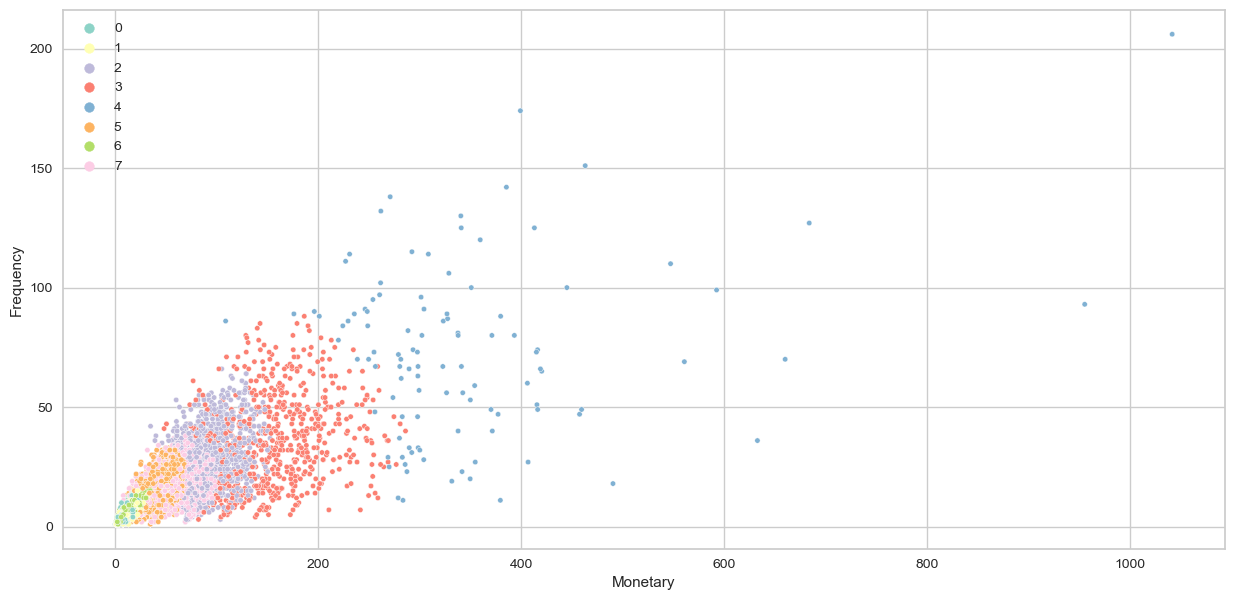

In [45]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=rfm_data_, x='Monetary', y='Frequency', hue = labels, s=15, palette="Set3")

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import numpy as np

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('agglomerative', AgglomerativeClustering()) 
])

labels = pipeline.fit_predict(rfm_data_)

unique_labels, counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Küme {label}: {count} örnek")


Küme 0: 7635 örnek
Küme 1: 2365 örnek


<Axes: xlabel='Monetary', ylabel='Frequency'>

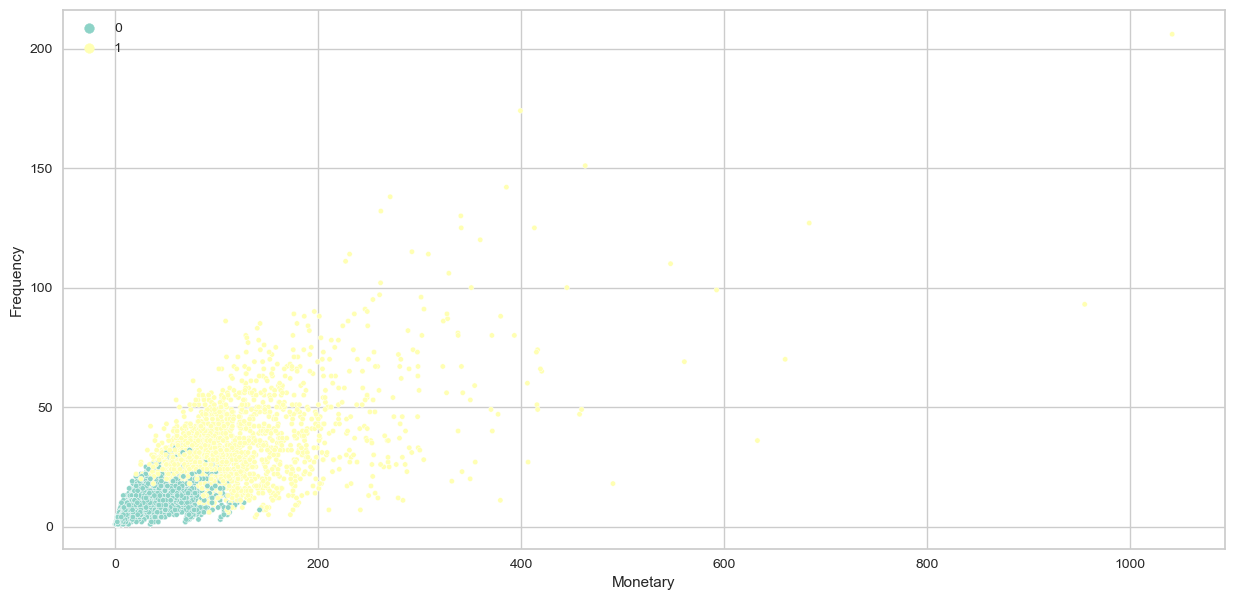

In [47]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=rfm_data_, x='Monetary', y='Frequency', hue = labels, s=15, palette="Set3")

In [48]:
rfm_data_['Cluster ID'] = labels

<Axes: xlabel='Cluster ID', ylabel='Monetary'>

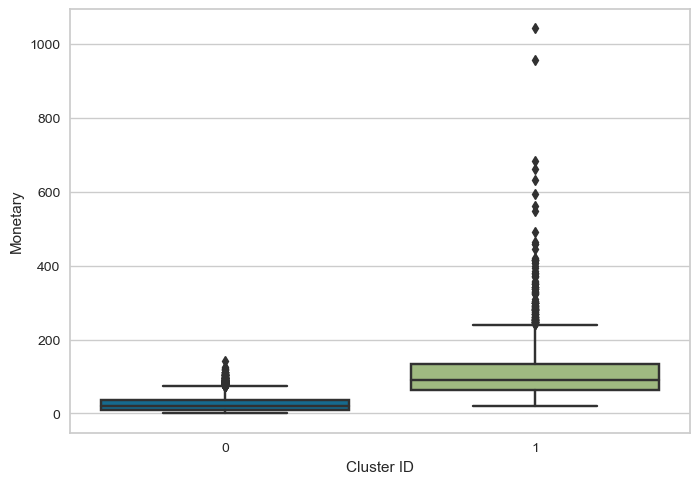

In [49]:
sns.boxplot(x='Cluster ID', y='Monetary', data=rfm_data_)

<Axes: xlabel='Cluster ID', ylabel='Frequency'>

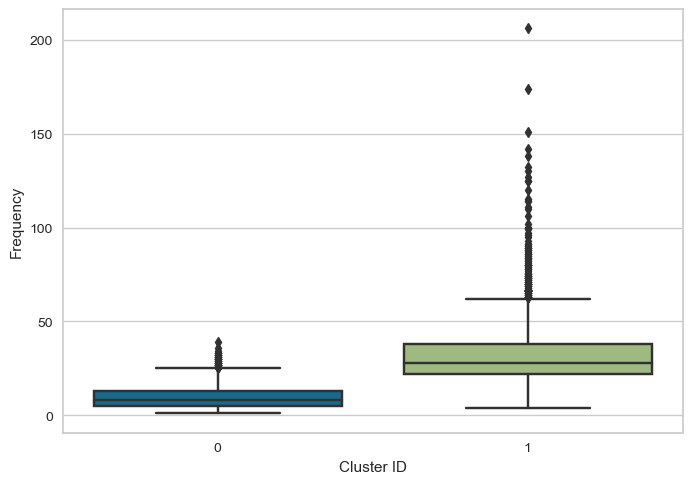

In [50]:
sns.boxplot(x='Cluster ID', y='Frequency', data=rfm_data_)

<Axes: xlabel='Cluster ID', ylabel='Recency'>

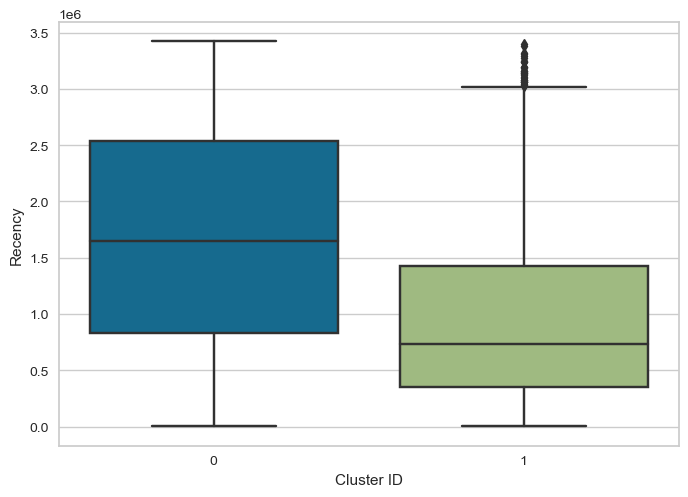

In [51]:
sns.boxplot(x='Cluster ID', y='Recency', data=rfm_data_)

In [52]:
s,i,labels = fit_kmeans(rfm_data,4,42)

In [53]:
clst_prd = pd.crosstab(data['user_id'], data['department'])
clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,1,0,0,0,3,0,0,...,1,0,0,0,0,1,0,0,3,3
7,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
10,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
13,0,0,2,0,0,0,1,3,0,0,...,0,0,0,0,0,0,0,0,3,1
17,1,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206201,0,0,0,2,0,0,0,3,0,2,...,0,0,0,0,0,0,3,0,1,1
206204,0,0,1,0,0,0,0,6,0,2,...,0,0,1,0,0,0,0,1,4,0
206206,0,0,0,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [54]:
clst_prd = pd.crosstab(data['user_id'], data['department'])
clst_prd['clusters'] = labels

clst_prd["Cluster Category"] = "No Data"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==0]="Cluster 1"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==1]="Cluster 2"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==2]="Cluster 3"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==3]="Cluster 4"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==4]="Cluster 5"

clst_prd

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_5000\1264239766.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_5000\1264239766.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_5000\1264239766.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\MahmutYAVUZ\AppData\Local\Temp\ipykernel_5000\1264239766.py:8: SettingWithCo

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,clusters,Cluster Category
user_id,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,1,0,0,0,3,0,0,...,0,0,0,1,0,0,3,3,2,Cluster 3
7,0,0,1,7,0,0,2,4,3,0,...,1,0,0,0,0,0,2,3,0,Cluster 1
10,0,0,0,0,0,0,0,5,4,0,...,4,0,0,4,0,0,13,0,0,Cluster 1
13,0,0,2,0,0,0,1,3,0,0,...,0,0,0,0,0,0,3,1,2,Cluster 3
17,1,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,2,Cluster 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206201,0,0,0,2,0,0,0,3,0,2,...,0,0,0,0,3,0,1,1,2,Cluster 3
206204,0,0,1,0,0,0,0,6,0,2,...,1,0,0,0,0,1,4,0,1,Cluster 2
206206,0,0,0,2,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,Cluster 1


In [55]:
def product_visualization(data, x):
    num_columns = len(data.columns) - 2
    column_list = data.columns.tolist() 
    column_list.remove('Cluster Category')
    column_list.remove('clusters')
    num_rows = int(num_columns/7)
    fig = sp.make_subplots(rows=num_rows, cols=num_columns // num_rows, subplot_titles=column_list)

    for index, col_name in enumerate(column_list, start=1):
        trace = px.box(data, x=x, y=col_name).data[0]
        row = (index - 1) // (num_columns // num_rows) + 1
        col = (index - 1) % (num_columns // num_rows) + 1
        fig.add_trace(trace, row=row, col=col)
    fig.update_layout(width=1500, height=1500,title_text="Product Analysis")
    try:
        for i in range(num_rows):
            # GitHub only displays static images, so I saved the images and visualized them later.
            image = imread(image_pth+f'product_analysis_{i+1}.png')
            fig, ax = plt.subplots(figsize=(15, 25))  
            ax.imshow(image)
            ax.axis('off')  
            plt.show()
    except:
        fig.show()


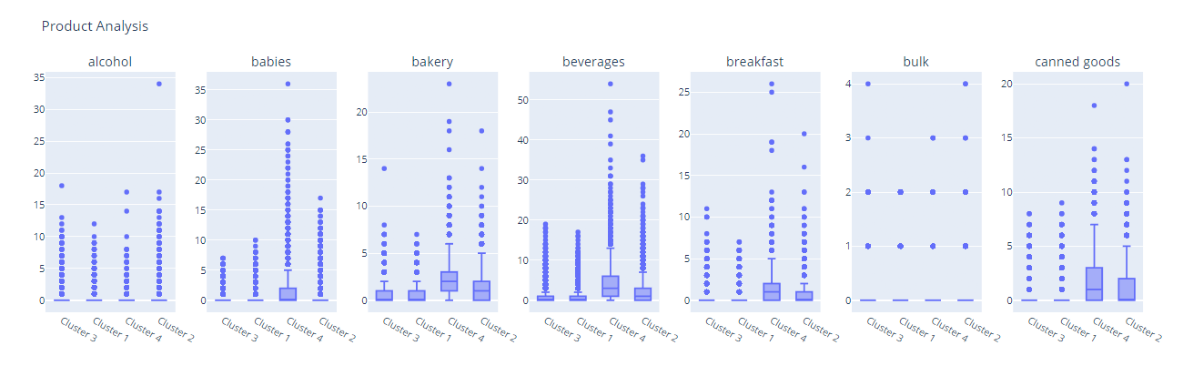

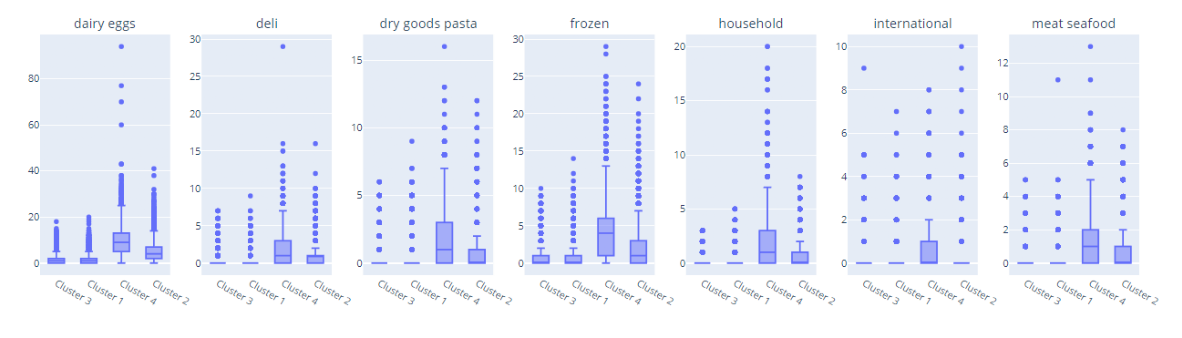

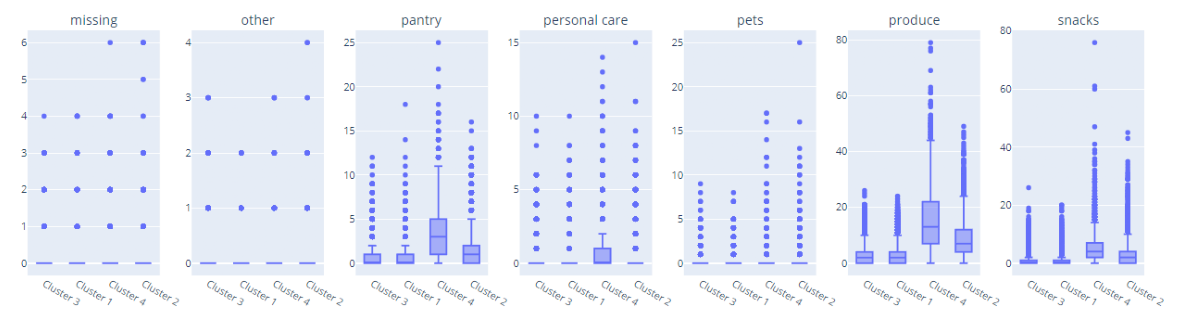

In [56]:
product_visualization(clst_prd,'Cluster Category')